In [24]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#import dati
data = pd.read_csv('ristoranti.csv', delimiter=';')
data.head()

,data,scontrini,totale,ristorante
0,20180101,21884.0,578251.44,R001
1,20180101,28101.0,904541.04,R002
2,20180101,19961.0,291457.92,R003
3,20180101,23173.0,596765.52,R004
4,20180101,19541.0,471594.24,R005


In [7]:
#check type
data.dtypes

data            int64
scontrini     float64
totale        float64
ristorante     object
dtype: object

In [8]:
# parsing data
data['data'] = pd.to_datetime(data['data'], format="%Y%m%d")
data.dtypes

data          datetime64[ns]
scontrini            float64
totale               float64
ristorante            object
dtype: object

In [9]:
#data = data.pivot_table(index='data', columns='ristorante', values=['scontrini','totale'])
#data.to_csv('provaprova.csv')

In [10]:
# date integration
# variable 'holiday' = 1 if the day is a holiday, 0 otherwise
holidays_2018 = pd.Series(pd.to_datetime(["2018-01-01", "2018-01-06", "2018-02-14", "2018-04-01", 
                                "2018-04-02", "2018-04-25", "2018-05-01", "2018-06-02", 
                                "2018-08-15", "2018-11-01", "2018-12-08", "2018-12-24", 
                                "2018-12-25", "2018-12-26", "2018-12-31"]))

holidays_2019 = pd.Series(pd.to_datetime(["2019-01-01", "2019-01-06", "2019-02-14", "2019-04-21", 
                                "2019-04-22", "2019-04-25", "2019-05-01", "2019-06-02", 
                                "2019-08-15", "2019-11-01", "2019-12-08", "2019-12-24", 
                                "2019-12-25", "2019-12-26", "2019-12-31"]))

holidays_2020 = pd.Series(pd.to_datetime(["2020-01-01", "2020-01-06", "2020-02-14", "2020-04-12", 
                                "2020-04-13", "2020-04-25", "2020-05-01", "2020-06-02", 
                                "2020-08-15", "2020-11-01", "2020-12-08", "2020-12-24", 
                                "2020-12-25", "2020-12-26", "2020-12-31"]))

holidays_2021 = pd.Series(pd.to_datetime(["2021-01-01", "2021-01-06", "2021-02-14", "2021-04-04", 
                                "2021-04-05", "2021-04-25", "2021-05-01", "2021-06-02", 
                                "2021-08-15", "2021-11-01", "2021-12-08", "2021-12-24", 
                                "2021-12-25", "2021-12-26", "2021-12-31"]))

holidays_2022 = pd.Series(pd.to_datetime(["2022-01-01", "2022-01-06", "2022-02-14", "2022-04-17", 
                                "2022-04-18", "2022-04-25", "2022-05-01", "2022-06-02", 
                                "2022-08-15", "2022-11-01", "2022-12-08", "2022-12-24", 
                                "2022-12-25", "2022-12-26", "2022-12-31"]))

holidays_2023 = pd.Series(pd.to_datetime(["2023-01-01", "2023-01-06", "2023-02-14", "2023-04-09", 
                                "2023-04-10", "2023-04-25", "2023-05-01", "2023-06-02", 
                                "2023-08-15", "2023-11-01", "2023-12-08", "2023-12-24", 
                                "2023-12-25", "2023-12-26", "2023-12-31"]))

holidays_2024 = pd.Series(pd.to_datetime(["2024-01-01", "2024-01-06", "2024-02-14", "2024-03-31", 
                                "2024-04-01", "2024-04-25", "2024-05-01", "2024-06-02", 
                                "2024-08-15", "2024-11-01", "2024-12-08", "2024-12-24", 
                                "2024-12-25", "2024-12-26", "2024-12-31"]))

all_holidays = pd.concat([holidays_2018, holidays_2019, holidays_2020, holidays_2021,
                          holidays_2022, holidays_2023, holidays_2024])

#variable 'average sale per receipt'
data['sales_per_receipt'] = data['totale'] / data['scontrini']

In [11]:
# Transforming the dataframe to have the desired structure of ristorants as columns

grouped_data = data.groupby(['ristorante', 'data']).agg({
    'scontrini': 'sum',
    'totale': 'sum'
}).reset_index()

pivot_scontrini = grouped_data.pivot(index='data', columns='ristorante', values='scontrini')
pivot_totale = grouped_data.pivot(index='data', columns='ristorante', values='totale')

restaurants_df = pd.concat([pivot_scontrini, pivot_totale], axis=1, keys=['scontrini', 'totale'])
restaurants_df.columns = [f'{attr}_{ristorante}' for attr, ristorante in restaurants_df.columns]
restaurants_df.reset_index(inplace=True)

# Reorder the columns to place scontrini and totale for each restaurant next to each other
columns_order = []
for ristorante in sorted(data['ristorante'].unique()):
    columns_order.append(f'scontrini_{ristorante}')
    columns_order.append(f'totale_{ristorante}')

columns_order = ['data'] + columns_order
restaurants_df = restaurants_df[columns_order]
restaurants_df = restaurants_df[restaurants_df['data'] >= '2018-09-01']

def get_season(date):
    Y = date.year
    seasons = {
        'Inverno': (pd.Timestamp(f'{Y}-12-21'), pd.Timestamp(f'{Y+1}-03-20')),
        'Primavera': (pd.Timestamp(f'{Y}-03-21'), pd.Timestamp(f'{Y}-06-20')),
        'Estate': (pd.Timestamp(f'{Y}-06-21'), pd.Timestamp(f'{Y}-09-20')),
        'Autunno': (pd.Timestamp(f'{Y}-09-21'), pd.Timestamp(f'{Y}-12-20'))
    }
    
    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    return'Inverno'

restaurants_df['weekend'] = restaurants_df['data'].apply(lambda x: 1 if x.weekday() >= 4 else 0)
restaurants_df['holiday'] = restaurants_df['data'].isin(all_holidays).astype(int)
restaurants_df['season'] = restaurants_df['data'].apply(get_season)

restaurants_df.head(20)

,data,scontrini_R001,totale_R001,scontrini_R002,totale_R002,scontrini_R003,totale_R003,scontrini_R004,totale_R004,scontrini_R005,totale_R005,scontrini_R067,totale_R067,weekend,holiday,season
243,2018-09-01,1276.0,37903.63,1238.0,44509.36,815.0,12843.98,1158.0,35282.11,774.0,20716.77,NaN,NaN,1,0,Estate
244,2018-09-02,1070.0,32612.52,971.0,37013.43,614.0,11186.60,974.0,28216.62,664.0,17360.71,NaN,NaN,1,0,Estate
245,2018-09-03,657.0,18721.47,782.0,27336.32,732.0,11780.12,808.0,20499.46,706.0,17965.21,NaN,NaN,0,0,Estate
246,2018-09-04,647.0,18962.33,793.0,27500.18,763.0,11823.71,731.0,19196.58,644.0,15124.61,NaN,NaN,0,0,Estate
247,2018-09-05,635.0,17765.62,758.0,25443.04,750.0,11815.69,760.0,19578.31,691.0,16779.77,NaN,NaN,0,0,Estate
248,2018-09-06,652.0,19102.57,827.0,28380.14,746.0,11993.69,741.0,20342.24,440.0,10646.50,NaN,NaN,0,0,Estate
249,2018-09-07,886.0,25488.90,953.0,31443.89,717.0,11423.54,897.0,26632.54,782.0,19139.48,NaN,NaN,1,0,Estate
250,2018-09-08,1097.0,32575.64,1185.0,41197.88,800.0,11788.20,1066.0,32253.41,817.0,21437.83,NaN,NaN,1,0,Estate
251,2018-09-09,874.0,25072.94,850.0,32054.16,655.0,10599.98,921.0,28025.09,657.0,17846.34,NaN,NaN,1,0,Estate
252,2018-09-10,627.0,18584.34,850.0,29050.82,745.0,11130.57,784.0,22448.46,918.0,21674.64,NaN,NaN,0,0,Estate


In [12]:
R001 = restaurants_df[['data', 'scontrini_R001', 'totale_R001', 'weekend', 'holiday', 'season']]
R002 = restaurants_df[['data', 'scontrini_R002', 'totale_R002', 'weekend', 'holiday', 'season']]
R003 = restaurants_df[['data', 'scontrini_R003', 'totale_R003', 'weekend', 'holiday', 'season']]
R004 = restaurants_df[['data', 'scontrini_R004', 'totale_R004', 'weekend', 'holiday', 'season']]
R005 = restaurants_df[['data', 'scontrini_R005', 'totale_R005', 'weekend', 'holiday', 'season']]
R067 = restaurants_df[['data', 'scontrini_R067', 'totale_R067', 'weekend', 'holiday', 'season']]



R001.to_csv('R001.csv', index=False)
R002.to_csv('R002.csv', index=False)
R003.to_csv('R003.csv', index=False)
R004.to_csv('R004.csv', index=False)
R005.to_csv('R005.csv', index=False)
R067.to_csv('R067.csv', index=False)

In [13]:
R001.head()

,data,scontrini_R001,totale_R001,weekend,holiday,season
243,2018-09-01,1276.0,37903.63,1,0,Estate
244,2018-09-02,1070.0,32612.52,1,0,Estate
245,2018-09-03,657.0,18721.47,0,0,Estate
246,2018-09-04,647.0,18962.33,0,0,Estate
247,2018-09-05,635.0,17765.62,0,0,Estate


In [27]:
montebello = pd.read_csv('Montebello_weather.csv')
piacenza = pd.read_csv('Piacenza_weather.csv')
stradella = pd.read_csv('Stradella_weather.csv')
voghera = pd.read_csv('Voghera_weather.csv')

In [15]:
def transform_weather(data):
    data['weather_condition'] = np.where((data['weather_code'] >= 0) & (data['weather_code'] <= 21), 'Favorable conditions',
                                  np.where((data['weather_code'] >= 22) & (data['weather_code'] <= 69), 'Moderate conditions',
                                  np.where((data['weather_code'] >= 70) & (data['weather_code'] <= 79), 'Difficult conditions',
                                  np.where((data['weather_code'] >= 80) & (data['weather_code'] <= 99), 'Extreme conditions', 'Unknown'))))
    data.drop(columns=['weather_code'], inplace=True)
    data['date'] = pd.to_datetime(data['date'])
    data['date'] = data['date'].dt.date
    data['date'] = pd.to_datetime(data['date'])
    data.drop(columns=['temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'daylight_duration', 'sunshine_duration', 'precipitation_sum',
       'rain_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_max'], inplace = True)
    return data

citta = {"montebello" : montebello, 
        "piacenza": piacenza, 
        "stradella": stradella, 
        "voghera": voghera}

for city, data in citta.items():
    transform_weather(data)

In [16]:
montebello.head()

,date,weather_condition
0,2017-12-31,Moderate conditions
1,2018-01-01,Favorable conditions
2,2018-01-02,Moderate conditions
3,2018-01-03,Moderate conditions
4,2018-01-04,Moderate conditions


In [17]:
R1_final = pd.merge(R001, piacenza, left_on='data', right_on='date', how='left')
R2_final = pd.merge(R002, piacenza, left_on='data', right_on='date', how='left')
R3_final = pd.merge(R003, piacenza, left_on='data', right_on='date', how='left')
R4_final = pd.merge(R004, stradella, left_on='data', right_on='date', how='left')
R5_final = pd.merge(R005, voghera, left_on='data', right_on='date', how='left')
R0_final = pd.merge(R067, montebello, left_on='data', right_on='date', how='left')

In [18]:
R0_final.to_csv('R0_final.csv', index=False)
R1_final.to_csv('R1_final.csv', index=False)
R2_final.to_csv('R2_final.csv', index=False)
R3_final.to_csv('R3_final.csv', index=False)
R4_final.to_csv('R4_final.csv', index=False)
R5_final.to_csv('R5_final.csv', index=False)

In [19]:
R1_final.head()

,data,scontrini_R001,totale_R001,weekend,holiday,season,date,weather_condition
0,2018-09-01,1276.0,37903.63,1,0,Estate,2018-09-01,Moderate conditions
1,2018-09-02,1070.0,32612.52,1,0,Estate,2018-09-02,Moderate conditions
2,2018-09-03,657.0,18721.47,0,0,Estate,2018-09-03,Favorable conditions
3,2018-09-04,647.0,18962.33,0,0,Estate,2018-09-04,Favorable conditions
4,2018-09-05,635.0,17765.62,0,0,Estate,2018-09-05,Moderate conditions


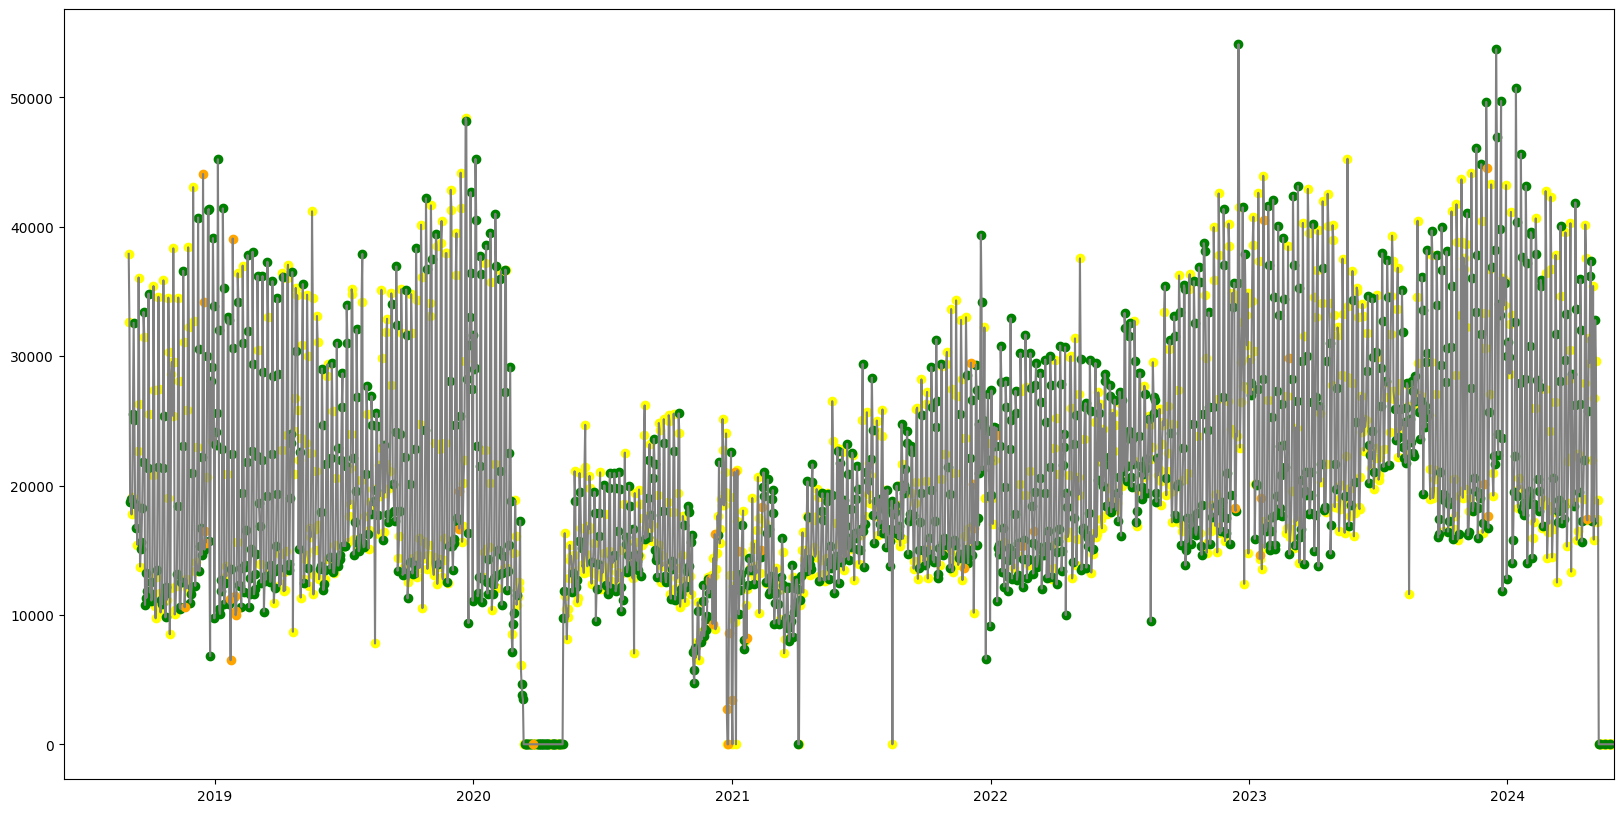

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(R1_final[R1_final['weather_condition'] == 'Moderate conditions']['data'], R1_final[R1_final['weather_condition'] == 'Moderate conditions']['totale_R001'],
         'o', color = 'yellow', label = 'Moderate')
plt.plot(R1_final[R1_final['weather_condition'] == 'Favorable conditions']['data'], R1_final[R1_final['weather_condition'] == 'Favorable conditions']['totale_R001'],
         'o', color = 'green', label = 'Favorable')
plt.plot(R1_final[R1_final['weather_condition'] == 'Difficult conditions']['data'], R1_final[R1_final['weather_condition'] == 'Difficult conditions']['totale_R001'],
         'o', color = 'orange', label = 'Difficult')
plt.plot(R1_final[R1_final['weather_condition'] == 'Extreme conditions']['data'], R1_final[R1_final['weather_condition'] == 'Extreme conditions']['totale_R001'],
         'o', color = 'red', label = 'Extreme')
plt.plot(R1_final['data'], R1_final['totale_R001'], color = 'gray', label = 'Vendite')
plt.xlim([pd.to_datetime('2018-06-01'), pd.to_datetime('2024-05-30')])
plt.show()

In [21]:
mediae1= R1_final[R1_final['weather_condition']== 'Extreme conditions']['totale_R001'].mean()
mediad1= R1_final[R1_final['weather_condition']== 'Difficult conditions']['totale_R001'].mean()
mediam1= R1_final[R1_final['weather_condition']== 'Moderate conditions']['totale_R001'].mean()
mediaf1= R1_final[R1_final['weather_condition']== 'Favorable conditions']['totale_R001'].mean()
print(mediae1,mediad1,mediaf1,mediam1)

nan 17363.173720930234 20257.542314410483 20950.651767288695


In [22]:
dati_disoccupazione = pd.read_csv('tasso_disoccupazione.csv')
dati_inflazione = pd.read_csv('DCSP_FOI1B2015_03112024122938076.csv')
col_infl = ["Flags", "Flag Codes", "TIPO_DATO2", "Tipo indice", "MISURA1", "Misura", "COICOP_2015"]
dati_inflazione.drop(columns=col_infl, inplace=True, errors='ignore')

In [23]:
dati_inflazione['COICOP Rev. Istat'].unique()

array(['indice generale', 'indice generale senza tabacchi',
       ' -- prodotti alimentari e bevande analcoliche',
       ' -- bevande alcoliche e tabacchi',
       ' -- abbigliamento e calzature',
       ' -- abitazione, acqua, elettricità, gas e altri combustibili',
       ' -- mobili, articoli e servizi per la casa',
       ' -- servizi sanitari e spese per la salute', ' -- trasporti',
       ' -- comunicazioni', ' -- ricreazione, spettacoli e cultura',
       ' -- istruzione', ' -- servizi ricettivi e di ristorazione',
       ' -- altri beni e servizi', 'COICOP_2015'], dtype=object)

In [41]:
inf1_rist = dati_inflazione.loc[(dati_inflazione['Territorio'] == 'Piacenza') & (dati_inflazione['COICOP Rev. Istat'] == ' -- servizi ricettivi e di ristorazione')]
inf2_gen = dati_inflazione.loc[(dati_inflazione['Territorio'] == 'Piacenza') & (dati_inflazione['COICOP Rev. Istat'] == 'indice generale')]

In [43]:
inf2_gen

,ITTER107,Territorio,COICOP Rev. Istat,TIME,Seleziona periodo,Value
162,ITD51,Piacenza,indice generale,2018-01,Gen-2018,0.9
163,ITD51,Piacenza,indice generale,2018-02,Feb-2018,0.3
164,ITD51,Piacenza,indice generale,2018-03,Mar-2018,0.6
165,ITD51,Piacenza,indice generale,2018-04,Apr-2018,0.3
166,ITD51,Piacenza,indice generale,2018-05,Mag-2018,0.8
...,...,...,...,...,...,...
238,ITD51,Piacenza,indice generale,2024-05,Mag-2024,0.8
239,ITD51,Piacenza,indice generale,2024-06,Giu-2024,0.8
240,ITD51,Piacenza,indice generale,2024-07,Lug-2024,1.3
241,ITD51,Piacenza,indice generale,2024-08,Ago-2024,1.0


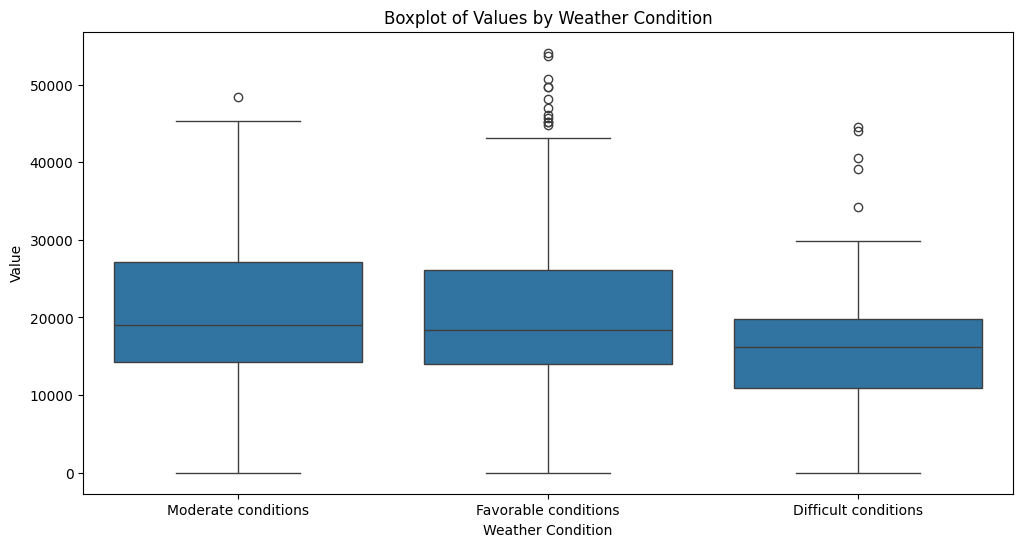

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_condition', y='totale_R001', data=R1_final)

# Add labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Value')
plt.title('Boxplot of Values by Weather Condition')

# Show the plot
plt.show()

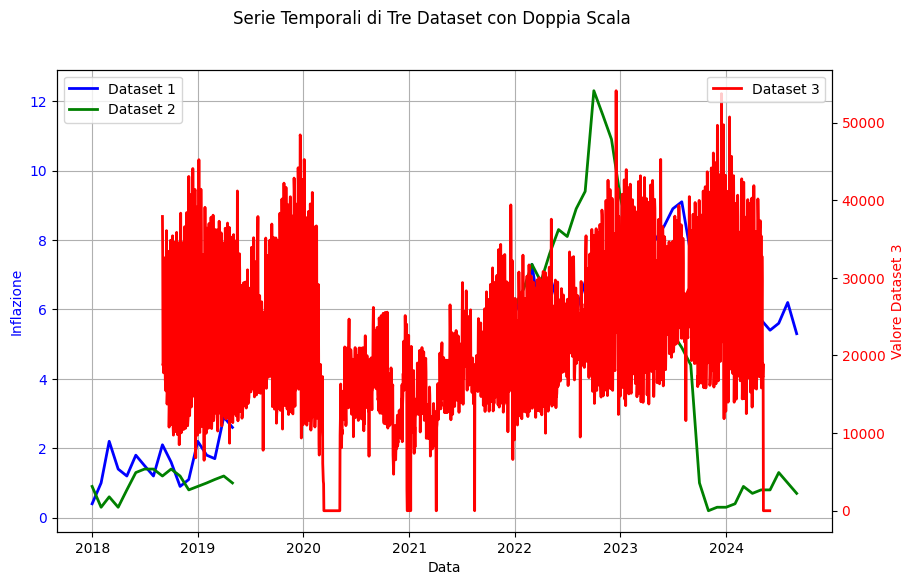

In [50]:


# Creazione del grafico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primo asse y
ax1.plot(inf1_rist['TIME'], inf1_rist['Value'], label='Dataset 1', color='blue', linewidth=2)
ax1.plot(inf2_gen['TIME'], inf2_gen['Value'], label='Dataset 2', color='green', linewidth=2)
ax1.set_xlabel('Data')
ax1.set_ylabel('Inflazione', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Secondo asse y
ax2 = ax1.twinx()
ax2.plot(R1_final['data'], R1_final['totale_R001'], label='Dataset 3', color='red', linewidth=2)
ax2.set_ylabel('Valore Dataset 3', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Legenda e titolo
fig.suptitle('Serie Temporali di Tre Dataset con Doppia Scala')
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Mostra il grafico
plt.show()

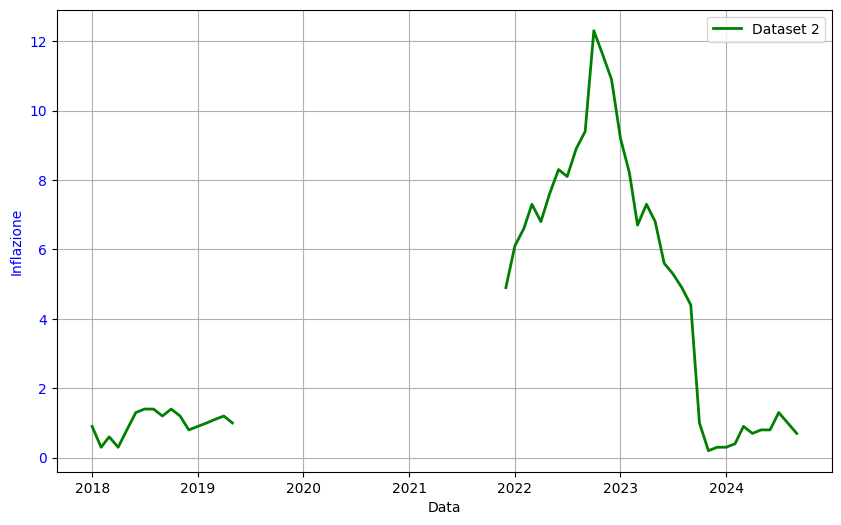

In [55]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primo asse y
ax1.plot(inf2_gen['TIME'], inf2_gen['Value'], label='Dataset 2', color='green', linewidth=2)
ax1.set_xlabel('Data')
ax1.set_ylabel('Inflazione', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

plt.legend()

plt.show()